# From [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')

## [Wine Quality Dataset](http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality)

### Read data from archive.
In this case, it is a csv with header, separator is ';'<br>
The download url is 
 http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

Use the read_csv() method of pandas dataframe https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

Use `df` as the dataframe name

In this dataset the column names are already included in the .csv file

In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, sep = ';')

### Show column names
Use the `columns` attribute of pandas on `df`

In [3]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Show portion of data
Use the `head` method of pandas dataframe

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Show histograms for all numeric values 
Use the `DataFrame.hist` method of Pandas. You can set the `figsize` parameter to adjust size

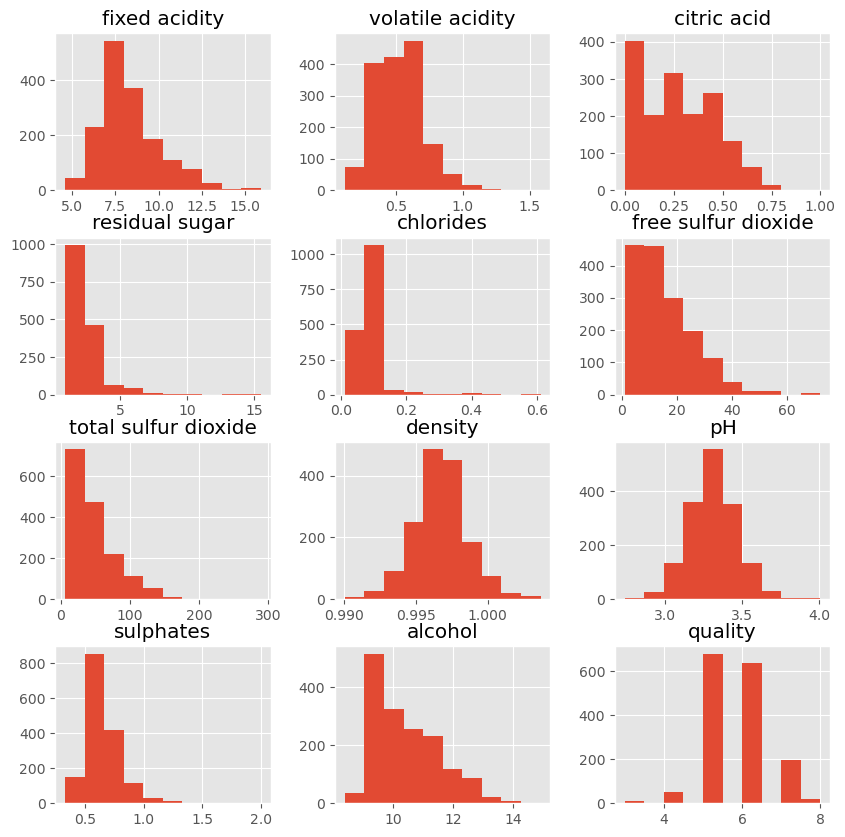

In [5]:
pd.DataFrame.hist(df
                  , figsize = [10,10]
                 );

### Show synthetic description
Use the `describe` method of Pandas

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


__Quality__ is the target class in this dataset. The **describe** method of pandas dataframes gives a short summary

In [7]:
df['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

The `unique` method of a pandas series returns the distinct values (a single column of a dataframe is a series)

In [8]:
import numpy as np # import the python package for numeric computing
np.sort(df['quality'].unique()) # the "sort" function of numpy returns a sorted array

array([3, 4, 5, 6, 7, 8])

### Plot an histogram for "quality"
Use the `hist` method of `matplotlib.pyplot` applied to the `quality` column of `df`

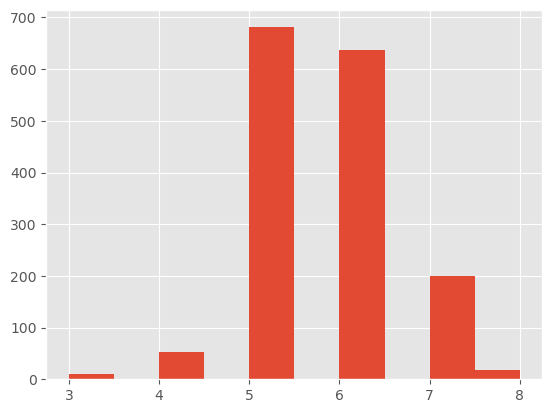

In [9]:
plt.hist(df['quality'])
plt.show()

### Scatter plots of pairs of columns

The colors of dots represent the class labels (`hue` parameter)

The `pairplot` of the *Seaborn* library is a powerful data exploration tool. It shows a plot of pairs of numeric attributes, and may represent as color the attribute chosen as class (the `hue` parameter). In this specific case the high number of attributes makes the representation not very clear.

Use df as argument to the `pairplot` method of Seaborn, specifying also `hue = 'quality'` and `diag_kws={'bw': 0.2}` (this last specification is a workaround necessary to deal with a singularity of this dataset

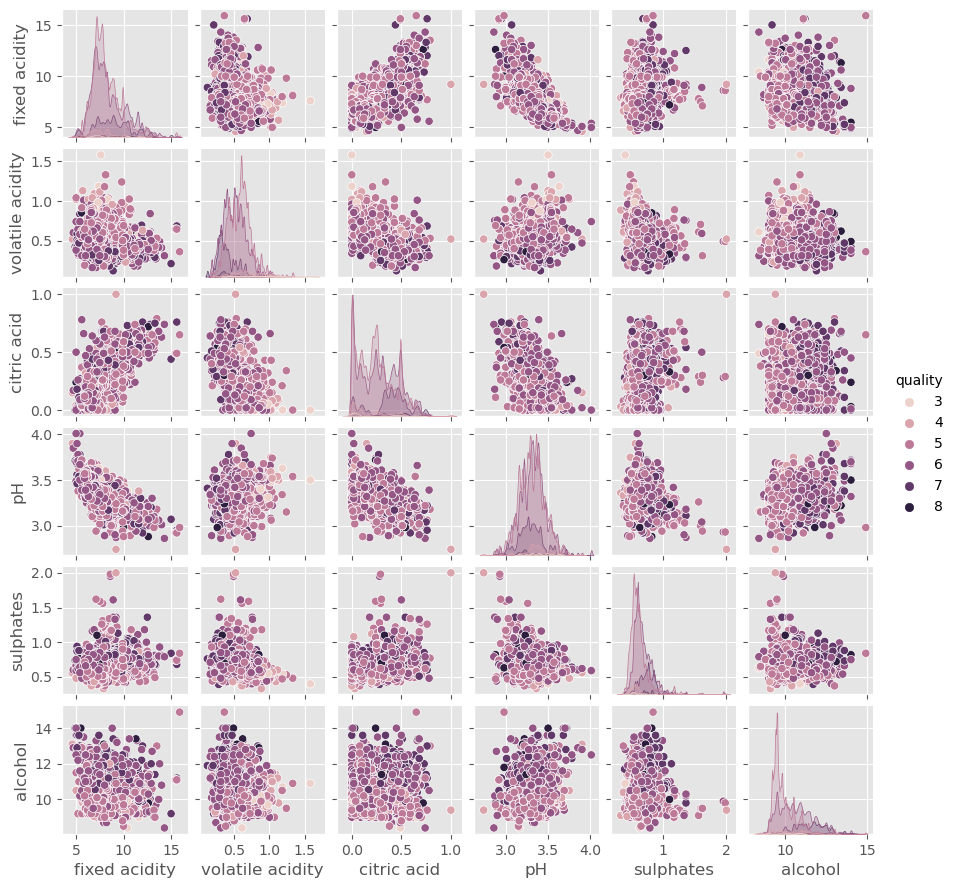

In [10]:
sns.pairplot(data = df.drop(df.columns[range(3,8)], axis='columns'), hue = 'quality'
             , height=1.5, aspect=1
             , diag_kws={'bw_adjust': 0.2}
            );

### Correlation coefficients
The `corr` method of a dataframe returns the pairwise correlations of the numeric attributes.

The `heatmap` function of `seaborn` produces a matrix of cells whith color darkness proportional to 
the matrix contents. 

`annot=True` fills the cells with the matrix values

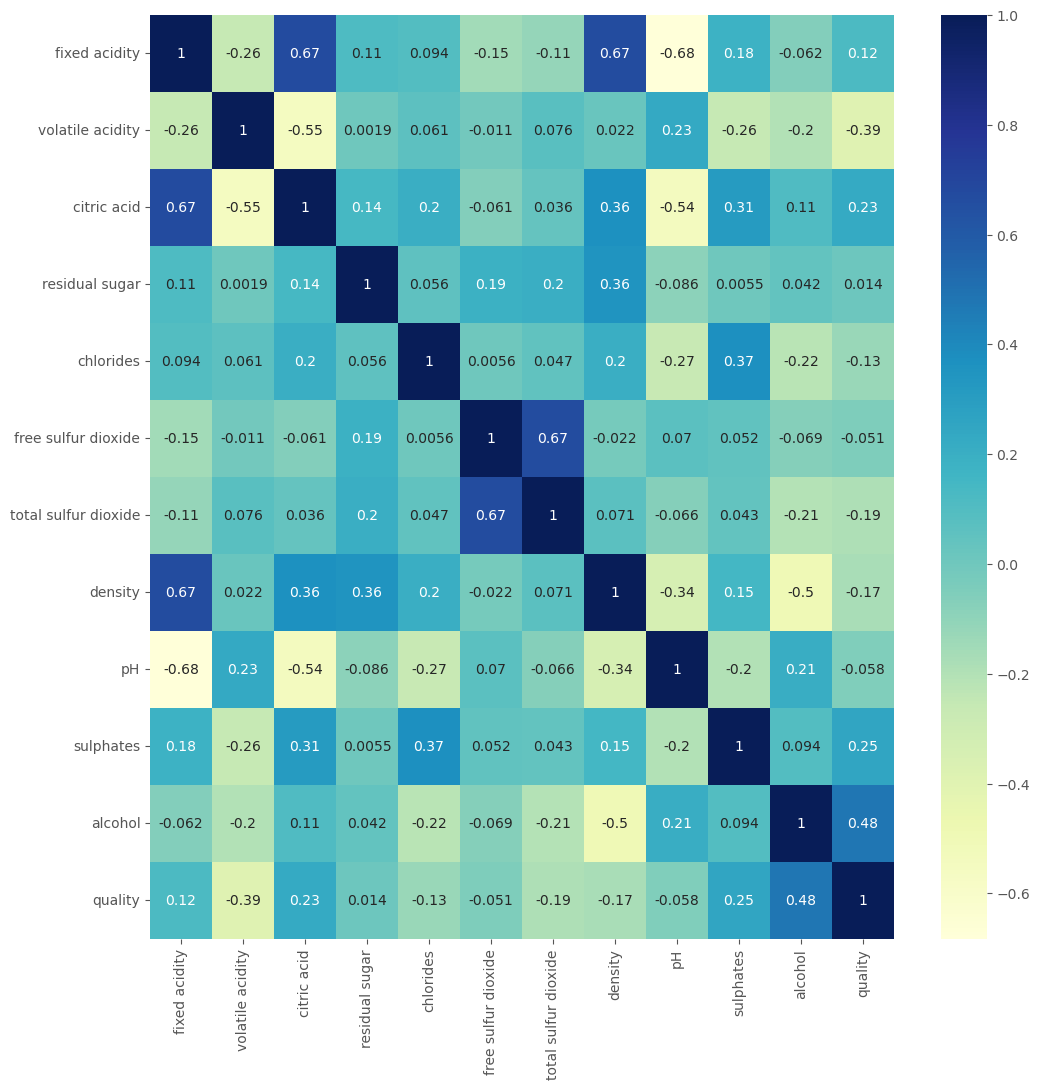

In [16]:
import matplotlib.pyplot as plt # import the general plotting package
corr = df[df.columns].corr()    # produces the correlation matrix (by default it is the Pearson's correlation)
plt.figure(figsize=(12,12))     # set the size of the figure that will be produced
sns.heatmap(corr, cmap="YlGnBu", annot=True); # produce the `heatmap` of a matrix

### Study the distribution of column values with the `boxplot`
Now we will explore the distribution of the values inside each column using the `boxplot`.

This kind of plot shows the three quartile values of the distribution along with extreme values. 

The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. This means that each value in the boxplot corresponds to an actual observation in the data <br> (*from the official Seaborn documentation*)

This view points out the *outliers*, that are the data falling in the extreme areas of the range of each column

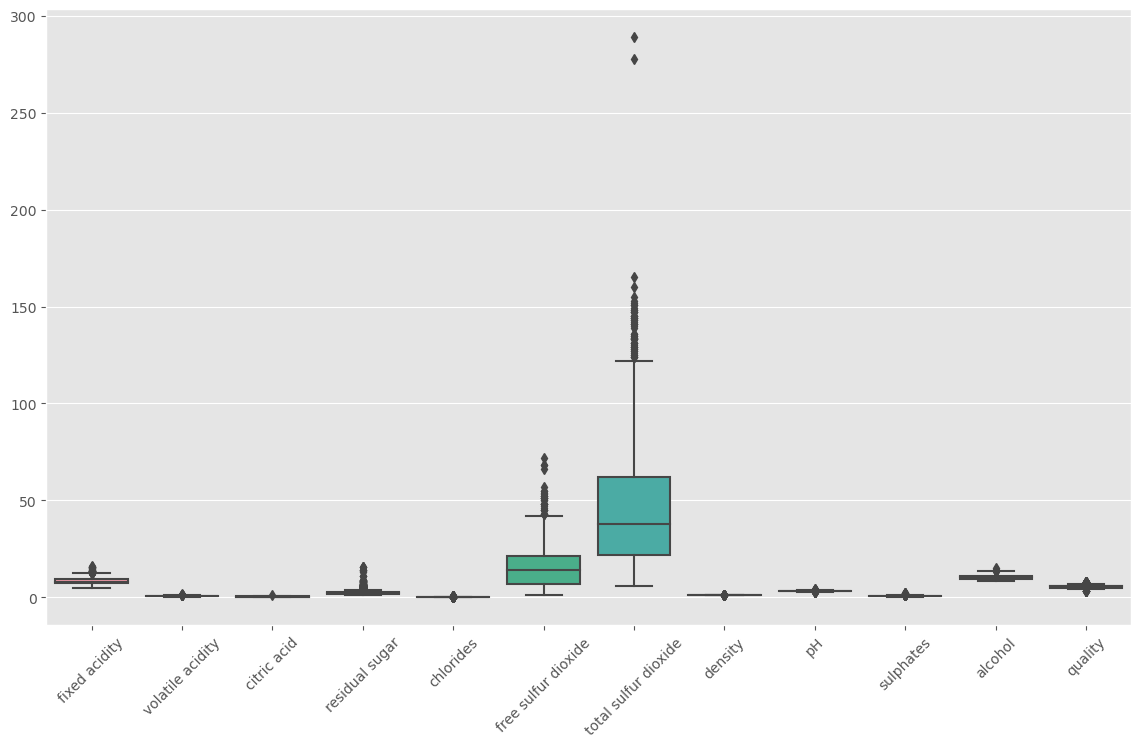

In [ ]:
plt.figure(figsize=(14,8))
_,labels = plt.xticks()
plt.setp(labels, rotation=45)
sns.boxplot(data = df);


For a separate boxplot for each column we need to use the `subplot` option of `pyplot`, specifying the numbers of rows and columns

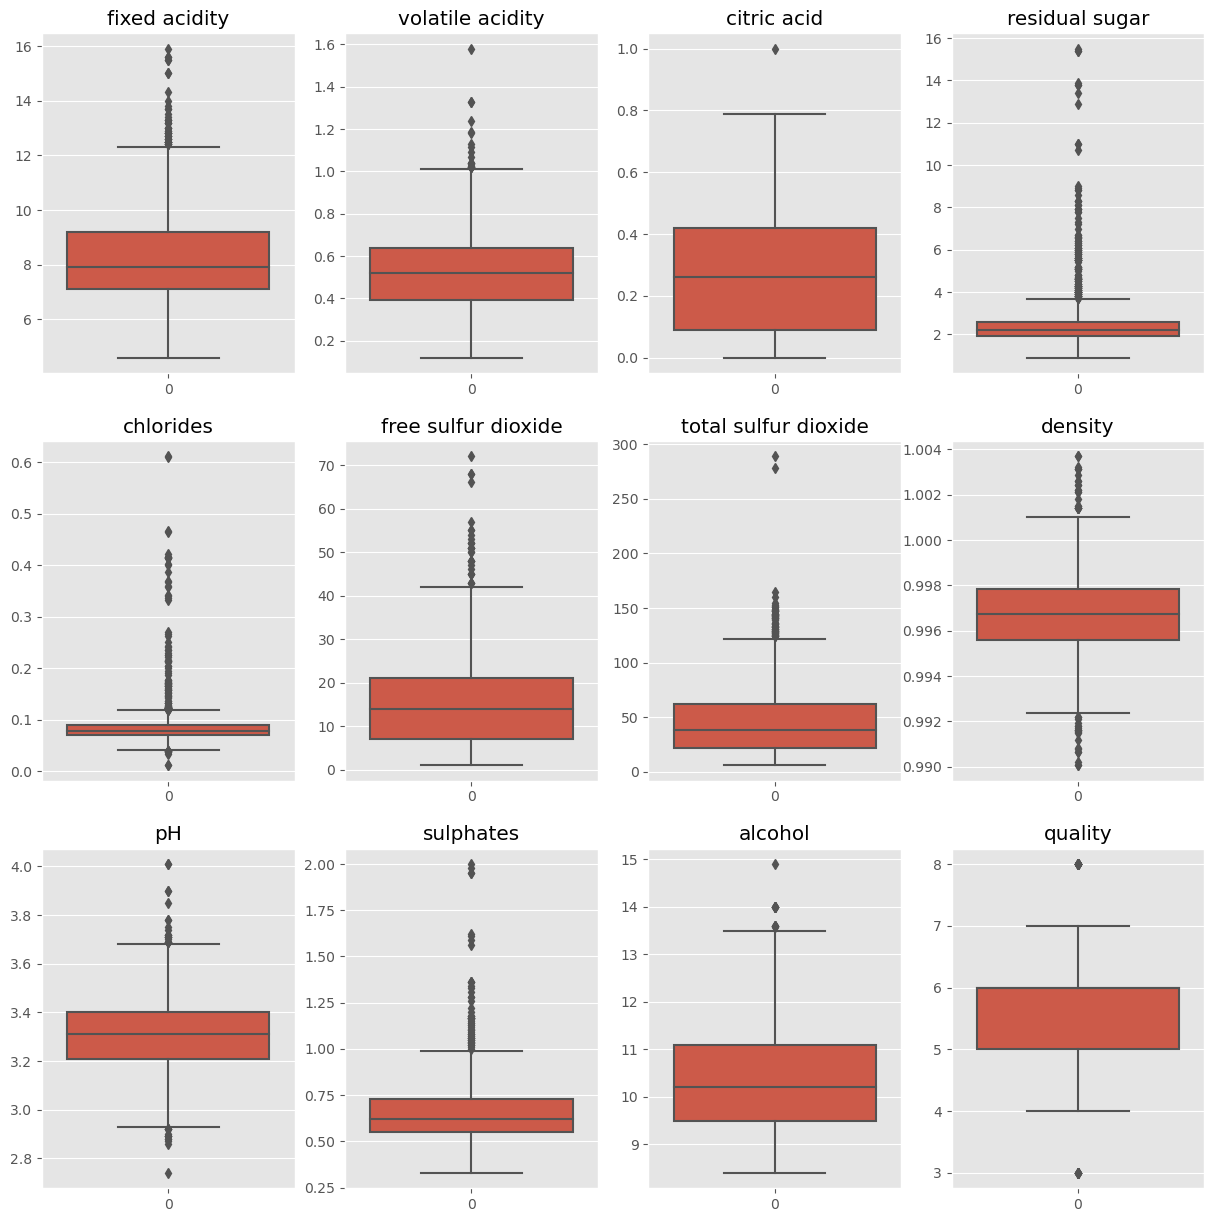

In [12]:
#--Checking Outliers
plt.figure(figsize=(15,15))
pos = 1
for i in df.columns:
    plt.subplot(3, 4, pos)  # boxplots arranged in 3 rows and 4 columns, 
                            # the `pos` parameter scans sequentially the positions
    sns.boxplot(data=df[i]).set_title(i) # set the title of each boxplot
    pos += 1

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

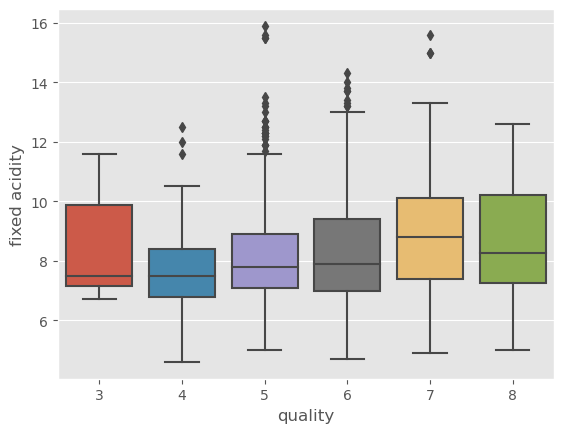

In [14]:
# sns.boxplot(x=df.iloc[:,-1], y = df.iloc[:,0])
sns.boxplot(x='quality', y='fixed acidity', data = df)

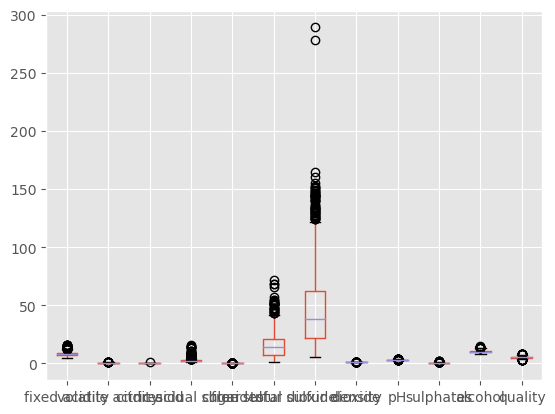

In [24]:
df.boxplot();